In [1]:
%matplotlib inline

In [2]:
from casat import plotants
plotants = plotants.plotants
from casat import listobs
listobs = listobs.listobs
from casat import plotms
plotms = plotms.plotms

/mnt/exthdd001/karl/workspace/caspyter/caspyter/casanova/python-env/lib/python2.7/site-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated since IPython 4.0.You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


Unable to start viewer, maybe no dbus available?


In [3]:
from casat import listobs
listobs = listobs.listobs

In [4]:
from casat import exportfits
exportfits = exportfits.exportfits

In [5]:
from casat import clean
clean = clean.clean

In [6]:
from casat import imview
imview = imview.imview

### About the Sample Data: Continuum and N2H+ in TW Hydra
---
The data for this example comes from ALMA Project 2011.0.00340.S, "*Searching for H2D+ in the disk of TW Hya v1.5*", for which the PI is Chunhua Qi. Part of the data for this project has been published in Qi et al. 2013.
The original observation had three scientific objectives:

* Image the submm continuum structure in TW Hydra

* Image the H2D+ line structure (rest frequency 372.42138 GHz)

* Image the N2H+ line structure (rest frequency 372.67249 GHz)

The data used in our tutorial has already been calibrated. Furthermore, to make the data set more manageable, we have reduced it in size by averaging in time and frequency. Our goal will be to image the continuum emission and the N2H+ spectral line, which is bright and well suited for demonstrating the imaging techniques.
The spectral window we will image covers 234.375 MHz in bandwidth, and contains 384 channels spaced by 610 kHz. The data includes observations from 21 of the ALMA 12-m main array antennas, observed during Early Science Cycle 0.

In [7]:
from casat import plotms
plotms = plotms.plotms

plotants(vis='sis14_twhya_calibrated_flagged.ms')

False

Using tasks, and getting oriented with the data
---
The first step in all data reduction with CASA is to examine the header information and data structure for the data set using the listobs task. In CASA, there are two ways to execute tasks. You can either set the parameters one-by-one and then instruct CASA to "go" when you're ready, or you can execute the task with a single command. For example, here is how you can use the first method:

In [19]:
ls

casapy-20161013-180118.log   secondary.model/
casapy.log                   secondary.psf/
First_Look_at_Imaging.ipynb  secondary.residual/
list.txt                     sis14_twhya_calibrated_flagged.fits
secondary.flux/              sis14_twhya_calibrated_flagged.ms/
secondary.image/


In [8]:
listobs(vis='sis14_twhya_calibrated_flagged.ms',listfile='list.txt')

True

In [9]:
cat list.txt

           MeasurementSet Name:  /home/vagrant/lab/maray/sis14_twhya_calibrated_flagged.ms      MS Version 2
   Observer: cqi     Project: uid://A002/X327408/X6f  
Observation: ALMA
Data records: 80563       Total elapsed time = 5647.68 seconds
   Observed from   19-Nov-2012/07:36:57.0   to   19-Nov-2012/09:11:04.7 (UTC)

   ObservationID = 0         ArrayID = 0
  Date        Timerange (UTC)          Scan  FldId FieldName             nRows     SpwIds   Average Interval(s)    ScanIntent
  19-Nov-2012/07:36:57.0 - 07:39:13.1     4      0 J0522-364                 4200  [0]  [6.05] [CALIBRATE_BANDPASS#ON_SOURCE,CALIBRATE_PHASE#ON_SOURCE,CALIBRATE_WVR#ON_SOURCE]
              07:44:45.2 - 07:47:01.2     7      2 Ceres                     3800  [0]  [6.05] [CALIBRATE_AMPLI#ON_SOURCE,CALIBRATE_PHASE#ON_SOURCE,CALIBRATE_WVR#ON_SOURCE]
              07:52:42.0 - 07:53:47.6    10      3 J1037-295                 1900  [0]  [6.05] [CALIBRATE_PHASE#ON_SOURCE,CALIBRATE_WVR#ON_SOURCE]
             

## First Look at Clean
---
Our secondary calibrator (also called the phase calibrator) is identified by field 3. Let's image this calibrator into an image file called "secondary." First, in case you've run this task before, let's remove old versions of the image that use this name. (The ".*" is needed because imaging produces several files with the same root name).

In [10]:
clean(vis='sis14_twhya_calibrated_flagged.ms',
imagename='secondary',
field='3',
spw='',
mode='mfs',
nterms=1,
imsize=[256,256],
cell=['0.1arcsec'],
weighting='natural',
threshold='0mJy')

In [11]:
ls

casapy-20161013-180118.log   secondary.image/
casapy.log                   secondary.model/
First_Look_at_Imaging.ipynb  secondary.psf/
list.txt                     secondary.residual/
secondary.flux/              sis14_twhya_calibrated_flagged.ms/


In [12]:
exportfits(
imagename='secondary.image', 
fitsimage='sis14_twhya_calibrated_flagged.fits', 
history=False,
dropstokes=True,
dropdeg=True,
overwrite=True)

In [13]:
ls

casapy-20161013-180118.log   secondary.model/
casapy.log                   secondary.psf/
First_Look_at_Imaging.ipynb  secondary.residual/
list.txt                     sis14_twhya_calibrated_flagged.fits
secondary.flux/              sis14_twhya_calibrated_flagged.ms/
secondary.image/


Opening FITS files and loading the image data
---
I will open the FITS file and find out what it contains.

In [14]:
from astropy.io import fits

In [15]:
import matplotlib.pyplot as plt

In [16]:
hdu_list = fits.open("sis14_twhya_calibrated_flagged.fits")
hdu_list.info()

Filename: sis14_twhya_calibrated_flagged.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU      46   (256, 256)   float32   


In [17]:
image_data = fits.getdata("sis14_twhya_calibrated_flagged.fits")
print(type(image_data))
print(image_data.shape)

<type 'numpy.ndarray'>
(256, 256)


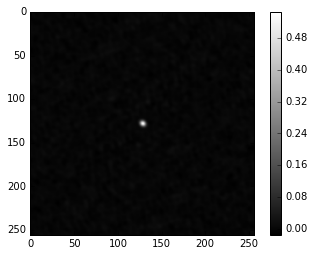

In [18]:
plt.imshow(image_data, cmap='gray')
plt.colorbar()

In [ ]:
plt.imshow(image_data, cmap='gray')
plt.colorbar()